In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams["figure.dpi"] = 120

In [2]:
df = pd.read_csv('history.csv', sep=';', index_col='date')

In [3]:
df.index = pd.to_datetime(df.index, infer_datetime_format=True)

In [4]:
df.tail(5)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2021-02-28,1.89%,3.15%,3.16%,1.62%,1.39%,3.72%,0.39%,1.49%,4.42%,1.88%,1.59%,0.90%,2.74%
2021-03-31,-0.48%,0.45%,1.63%,-0.81%,1.02%,1.60%,0.56%,0.93%,0.75%,-1.35%,0.54%,0.20%,0.04%
2021-04-30,-0.01%,2.50%,2.16%,2.57%,1.47%,2.76%,0.92%,2.33%,2.49%,2.34%,1.09%,NaN,1.89%
2021-05-31,0.56%,1.64%,1.68%,2.09%,0.35%,1.25%,0.30%,1.88%,0.85%,0.58%,0.67%,NaN,0.22%
2021-06-30,0.24%,-0.56%,1.03%,0.96%,0.27%,0.25%,-0.31%,-1.16%,0.18%,0.19%,0.36%,3.41%,0.35%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 1997-01-31 to 2021-06-30
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Convertible Arbitrage   294 non-null    object
 1   CTA Global              294 non-null    object
 2   Distressed Securities   294 non-null    object
 3   Emerging Markets        294 non-null    object
 4   Equity Market Neutral   294 non-null    object
 5   Event Driven            294 non-null    object
 6   Fixed Income Arbitrage  294 non-null    object
 7   Global Macro            294 non-null    object
 8   Long/Short Equity       294 non-null    object
 9   Merger Arbitrage        294 non-null    object
 10  Relative Value          294 non-null    object
 11  Short Selling           287 non-null    object
 12  Funds Of Funds          294 non-null    object
dtypes: object(13)
memory usage: 32.2+ KB


<AxesSubplot:>

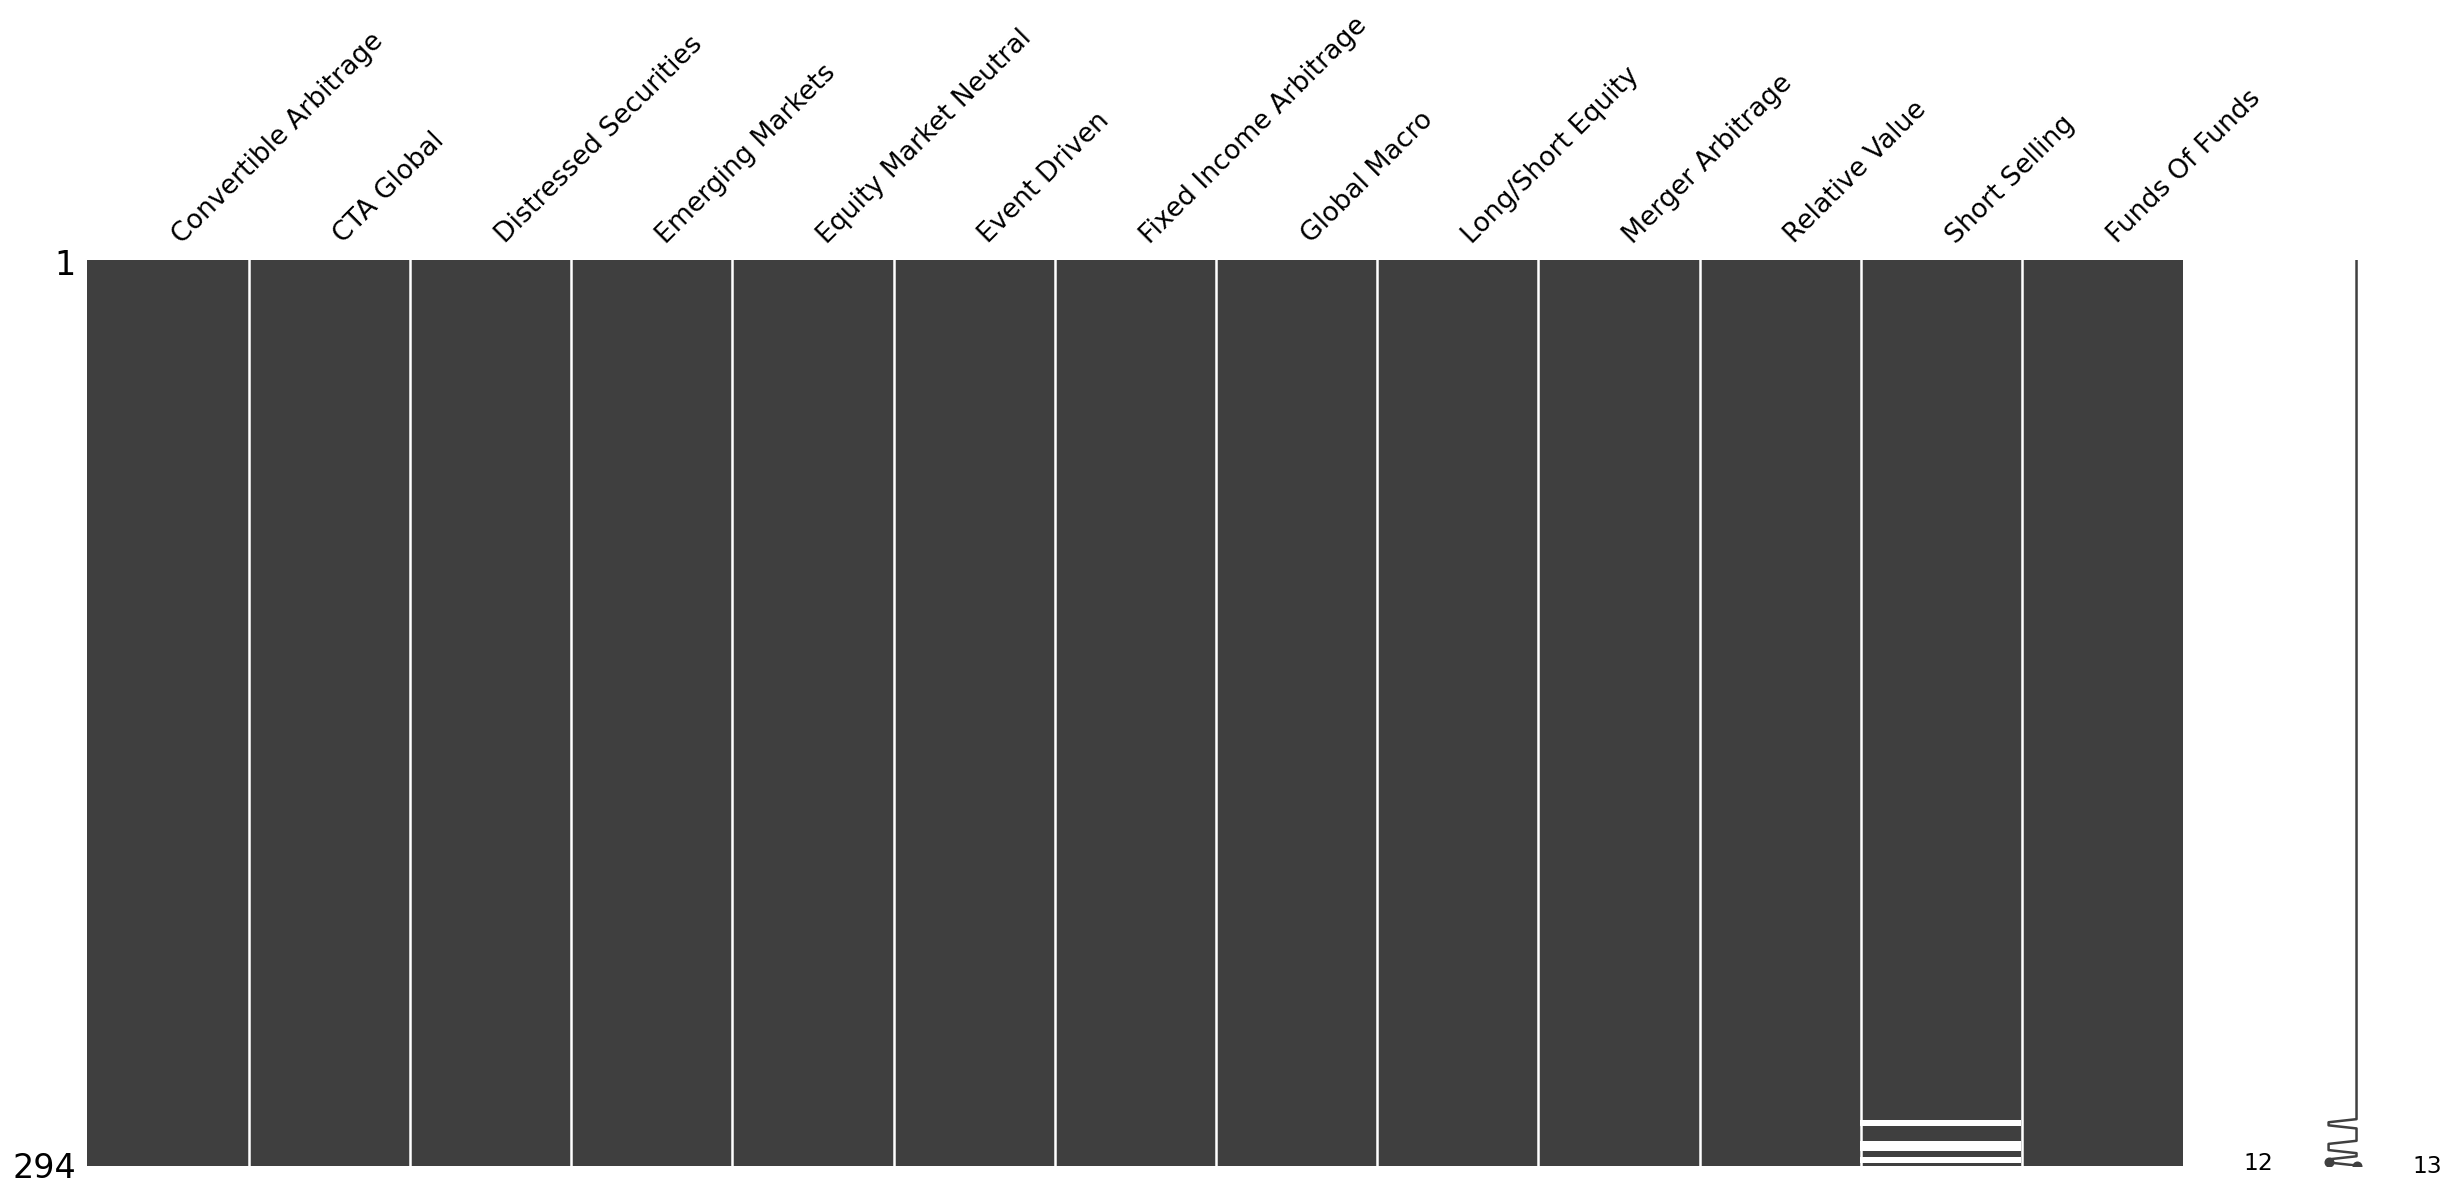

In [6]:
msno.matrix(df)

<AxesSubplot:>

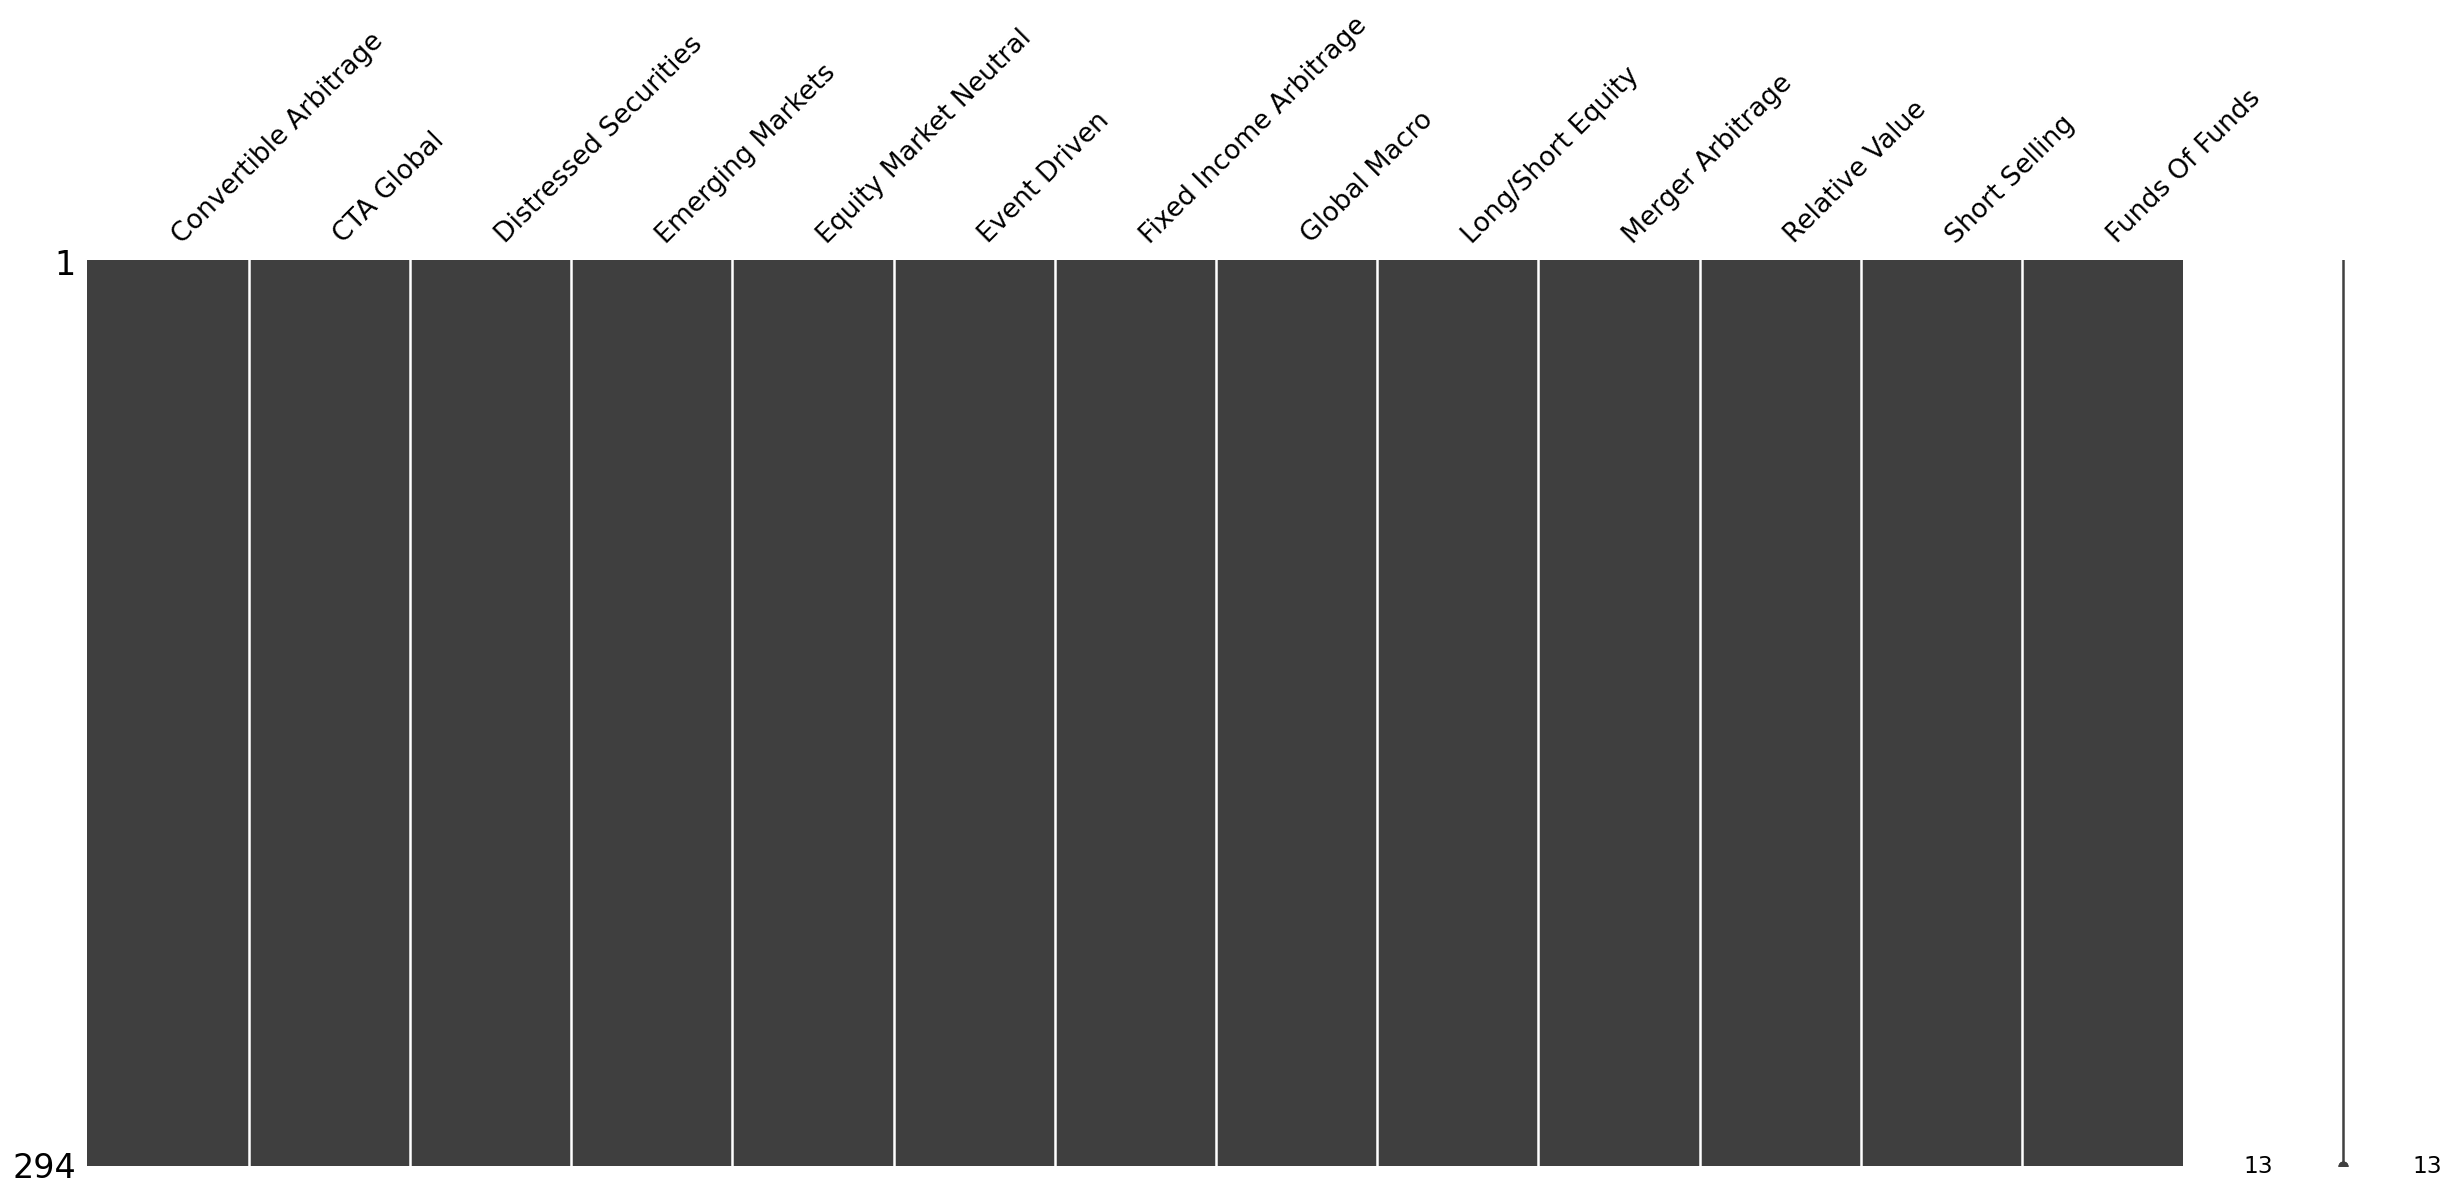

In [7]:
cols = df.columns
for col in cols:
    df[col] = pd.to_numeric(df[col].str.strip('%'))
    
df = df.fillna(method='ffill')
msno.matrix(df)

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/2758211675.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.index, fontfamily='serif', rotation=0)


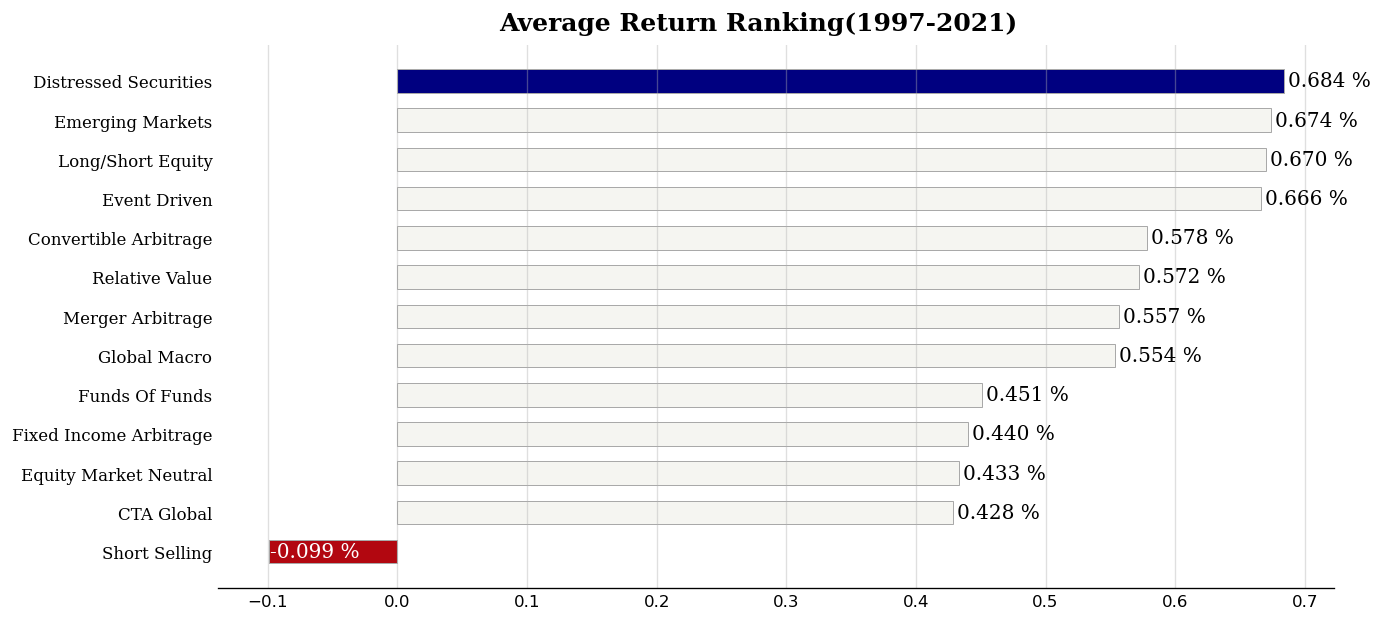

In [8]:
data = df.mean().sort_values()


# Plot

color_map = ['#f5f5f1' for _ in range(len(data))]
color_map[0] = '#b20710' # color highlight
color_map[-1] = 'navy'
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.barh(data.index, data, height=0.6, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
sign = 1
for i in data.index:
    color = 'white' if data[i]<0 else 'black'
    if data[i] < 0:
        sign = -1
    else:
        sign = 1
    ax.annotate(f"{data[i]:.3f} %", 
                   xy=(data[i] + 0.035, i), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', fontsize='12', color=color)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_yticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.5, 0.9, 'Average Return Ranking(1997-2021)', fontsize=15, fontweight='bold', fontfamily='serif', ha='center')

ax.grid(axis='x', linestyle='-', alpha=0.4)   

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.savefig('Average Return Ranking(1997-2021).jpg', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/1140843073.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.index, fontfamily='serif', rotation=0)


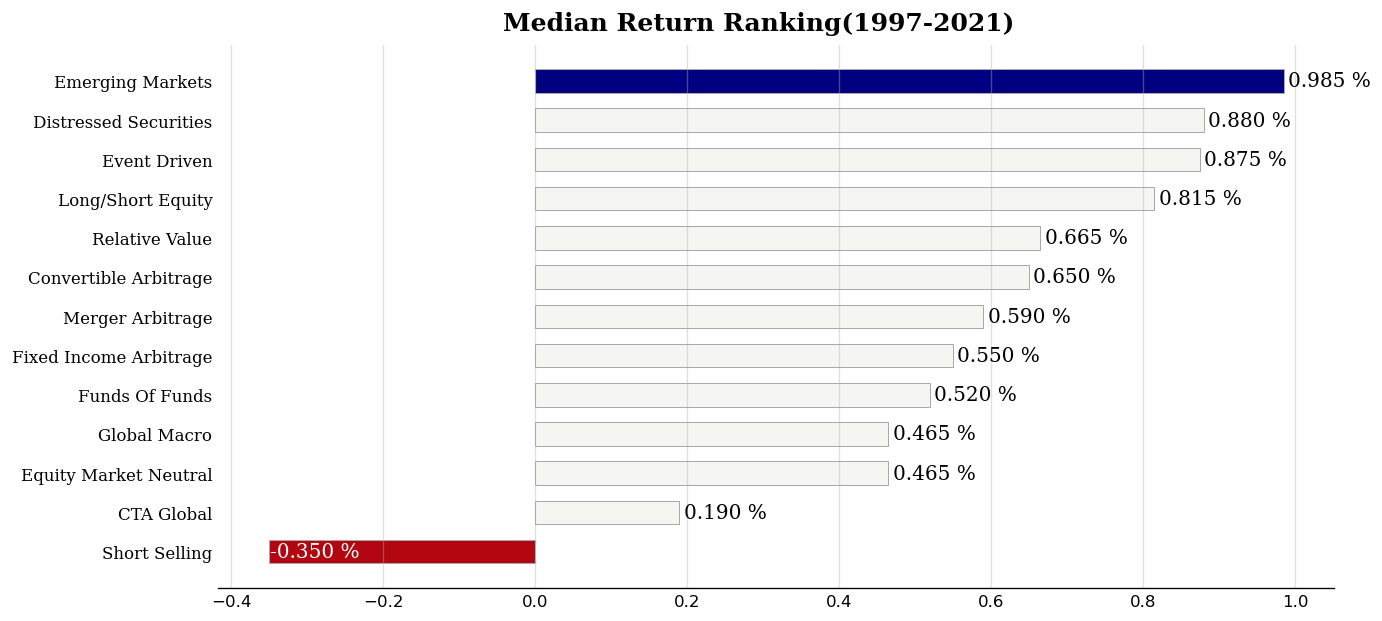

In [9]:

data = df.median().sort_values()


# Plot

color_map = ['#f5f5f1' for _ in range(len(data))]
color_map[0] = '#b20710' # color highlight
color_map[-1] = 'navy'
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.barh(data.index, data, height=0.6, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
sign = 1
for i in data.index:
    color = 'white' if data[i]<0 else 'black'
    if data[i] < 0:
        sign = -1
    else:
        sign = 1
    ax.annotate(f"{data[i]:.3f} %", 
                   xy=(data[i] + 0.06, i), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', fontsize='12', color=color)

# # Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_yticklabels(data.index, fontfamily='serif', rotation=0)

# Title

fig.text(0.5, 0.9, 'Median Return Ranking(1997-2021)', fontsize=15, fontweight='bold', fontfamily='serif', ha='center')

ax.grid(axis='x', linestyle='-', alpha=0.4)   

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.savefig('Median Return Ranking(1997-2021).jpg', dpi=300, bbox_inches='tight')
plt.show()


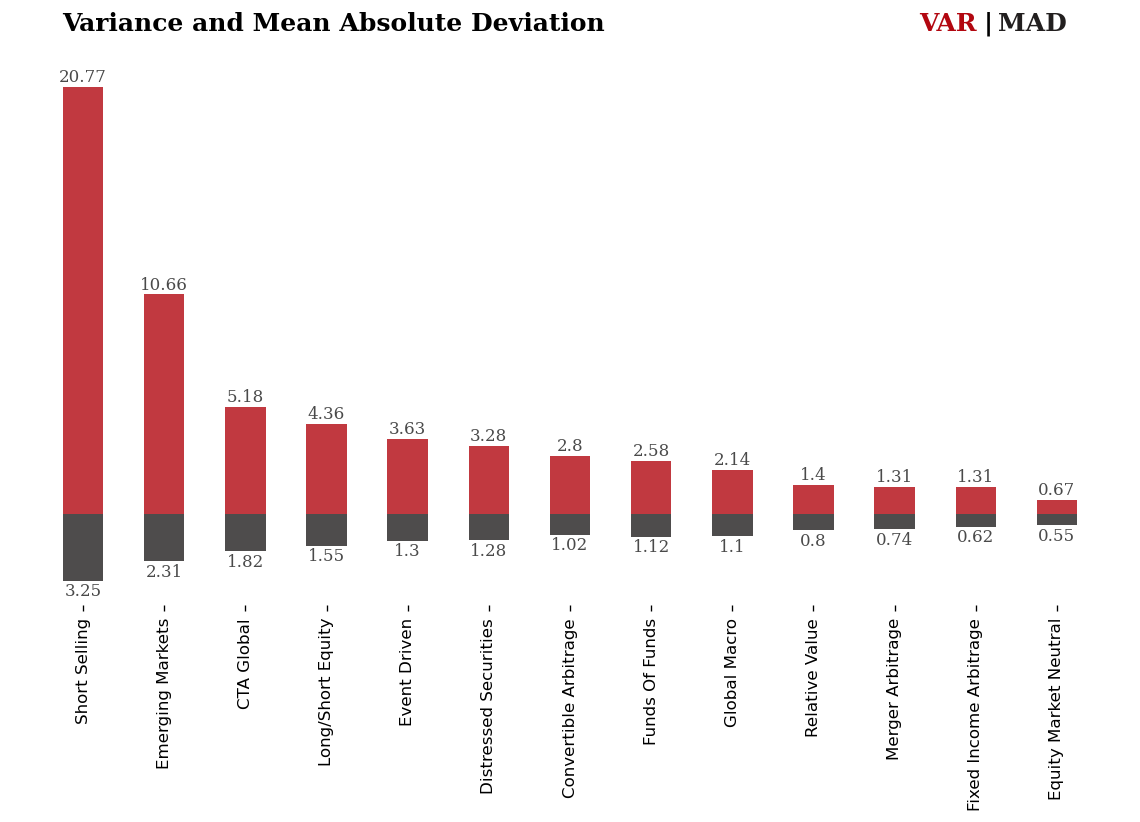

In [10]:
var = df.var().sort_values(ascending=False)
mad = - df.mad().sort_values(ascending=False)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(var.index, var, width=0.5, color='#b20710', alpha=0.8, label='VAR')
ax.bar(mad.index, mad, width=0.5, color='#221f1f', alpha=0.8, label='STD')


ax.tick_params(axis='x', labelrotation=90)

# Annotations
for i in var.index:
    ax.annotate(f"{round(var[i], 2)}", 
                   xy=(i, var[i] + 0.5),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in mad.index:
    ax.annotate(f"{-round(mad[i], 2)}", 
                   xy=(i, mad[i] - 0.5),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



ax.set_yticks([])    

fig.text(0.16, 0.924, 'Variance and Mean Absolute Deviation', fontsize=15, fontweight='bold', fontfamily='serif')



fig.text(0.755,0.924,"VAR", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.800,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.810,0.924,"MAD", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


plt.show()

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/4150935112.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_ratio.index, fontfamily='serif', fontsize=11)


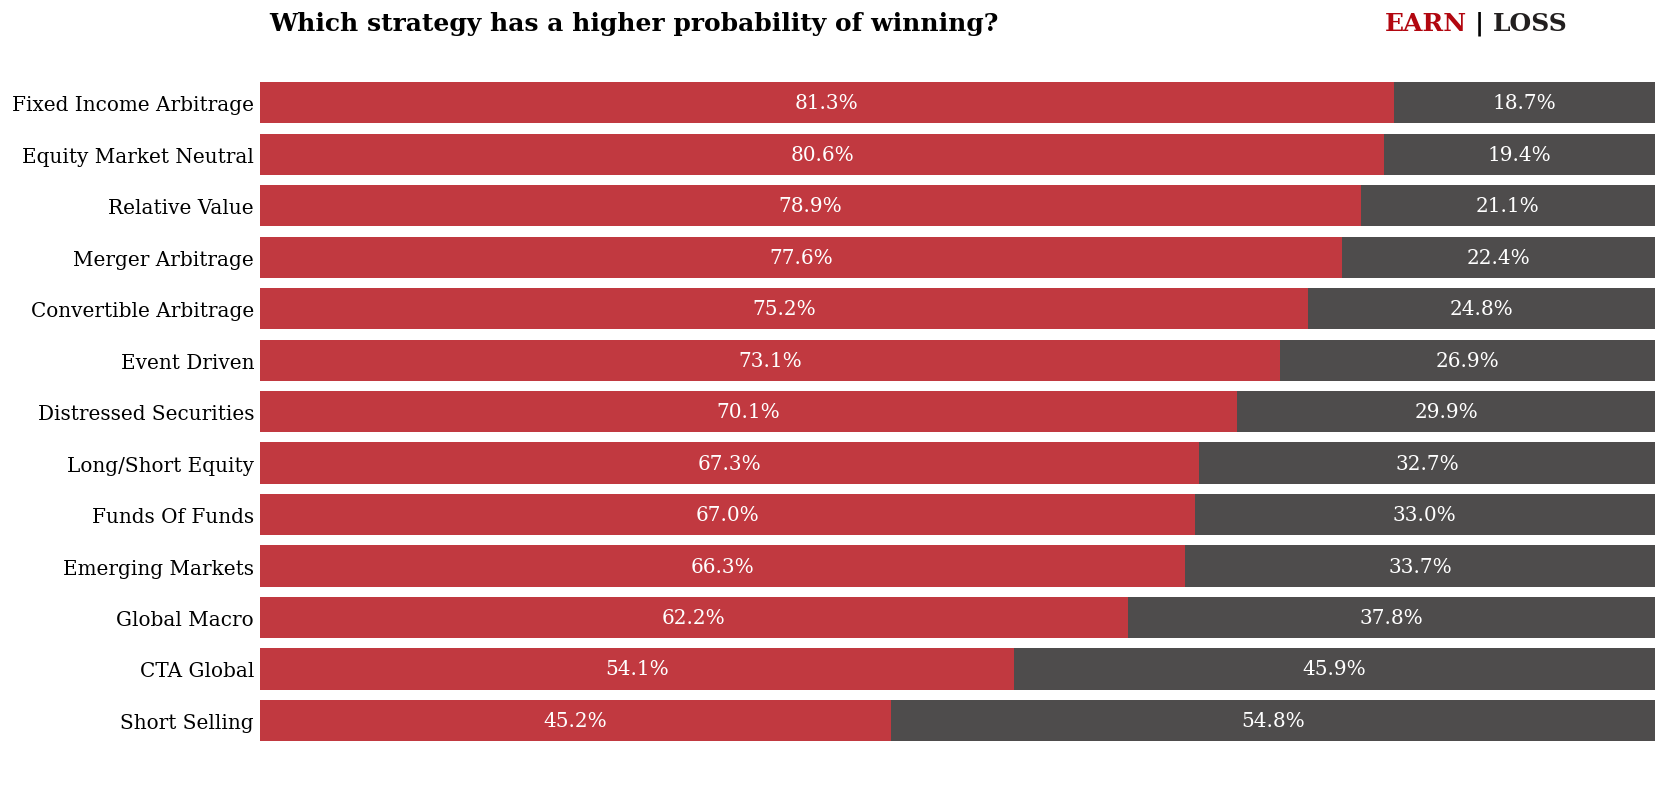

In [11]:
df_ratio = (df[df>0].count()/len(df)).to_frame(name='EARN')
df_ratio['LOSS'] = 1 - df_ratio['EARN']
df_ratio = df_ratio.sort_values(by='EARN')

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(df_ratio.index, df_ratio['EARN'], 
        color='#b20710', alpha=0.8, label='EARN')
ax.barh(df_ratio.index, df_ratio['LOSS'], left=df_ratio['EARN'], 
        color='#221f1f', alpha=0.8, label='LOSS')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(df_ratio.index, fontfamily='serif', fontsize=11)


for i in df_ratio.index:
    ax.annotate(f"{df_ratio['EARN'][i]*100:.3}%", 
                   xy=(df_ratio['EARN'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in df_ratio.index:
    ax.annotate(f"{df_ratio['LOSS'][i]*100:.3}%", 
                   xy=(df_ratio['EARN'][i]+df_ratio['LOSS'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.9, 'Which strategy has a higher probability of winning?', fontsize=15, fontweight='bold', fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"EARN", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.80,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.81,0.9,"LOSS", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/3297347676.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


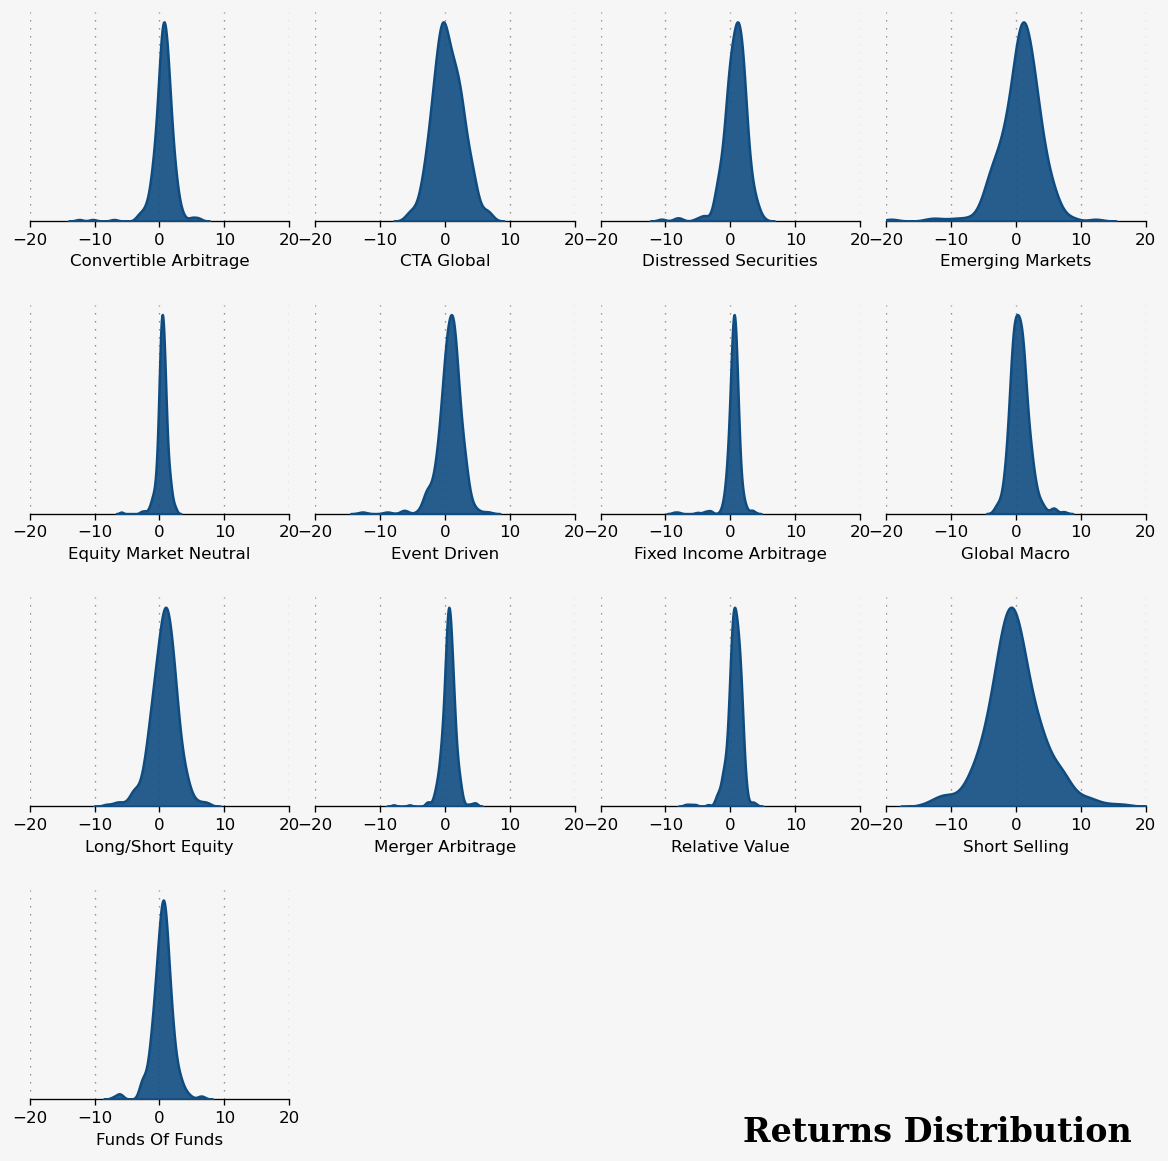

In [12]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"



run_no = 0
for row in range(0, 4):
    for col in range(0, 4):
        if row == 3 and col > 0:
            break
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_xlim(-20, 20)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in df.columns.tolist():
        sns.kdeplot(df[variable] , color='#0f4c81',ax=locals()["ax"+str(run_no)], shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False) 
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        plt.xlim(-20, 20)
        run_no += 1
        
ax0.text(90, -1.60, 'Returns Distribution', fontsize=20, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/3115648541.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


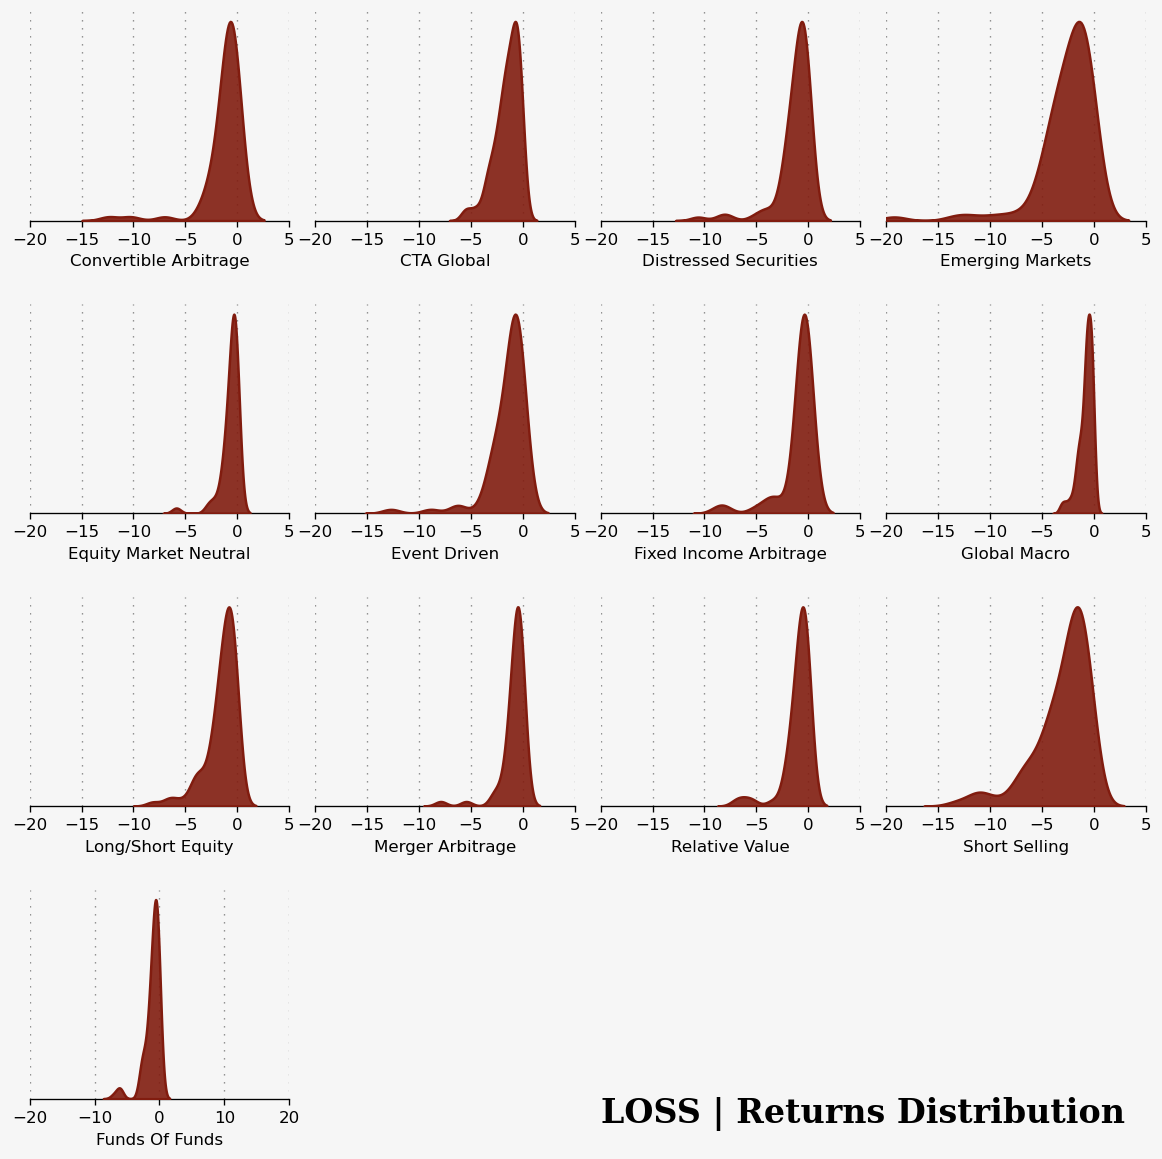

In [13]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"



run_no = 0
for row in range(0, 4):
    for col in range(0, 4):
        if row == 3 and col > 0:
            break
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_xlim(-20, 5)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in df.columns.tolist():
        sns.kdeplot(df[df<0][variable] ,ax=locals()["ax"+str(run_no)], color='#811c0f', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        plt.xlim(-20, 20)
        run_no += 1
        
ax0.text(35, -1.55, 'LOSS | Returns Distribution', fontsize=20, fontweight='bold', fontfamily='serif')

plt.xlim(-20, 20)
plt.tight_layout()
plt.show()

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/1747514904.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


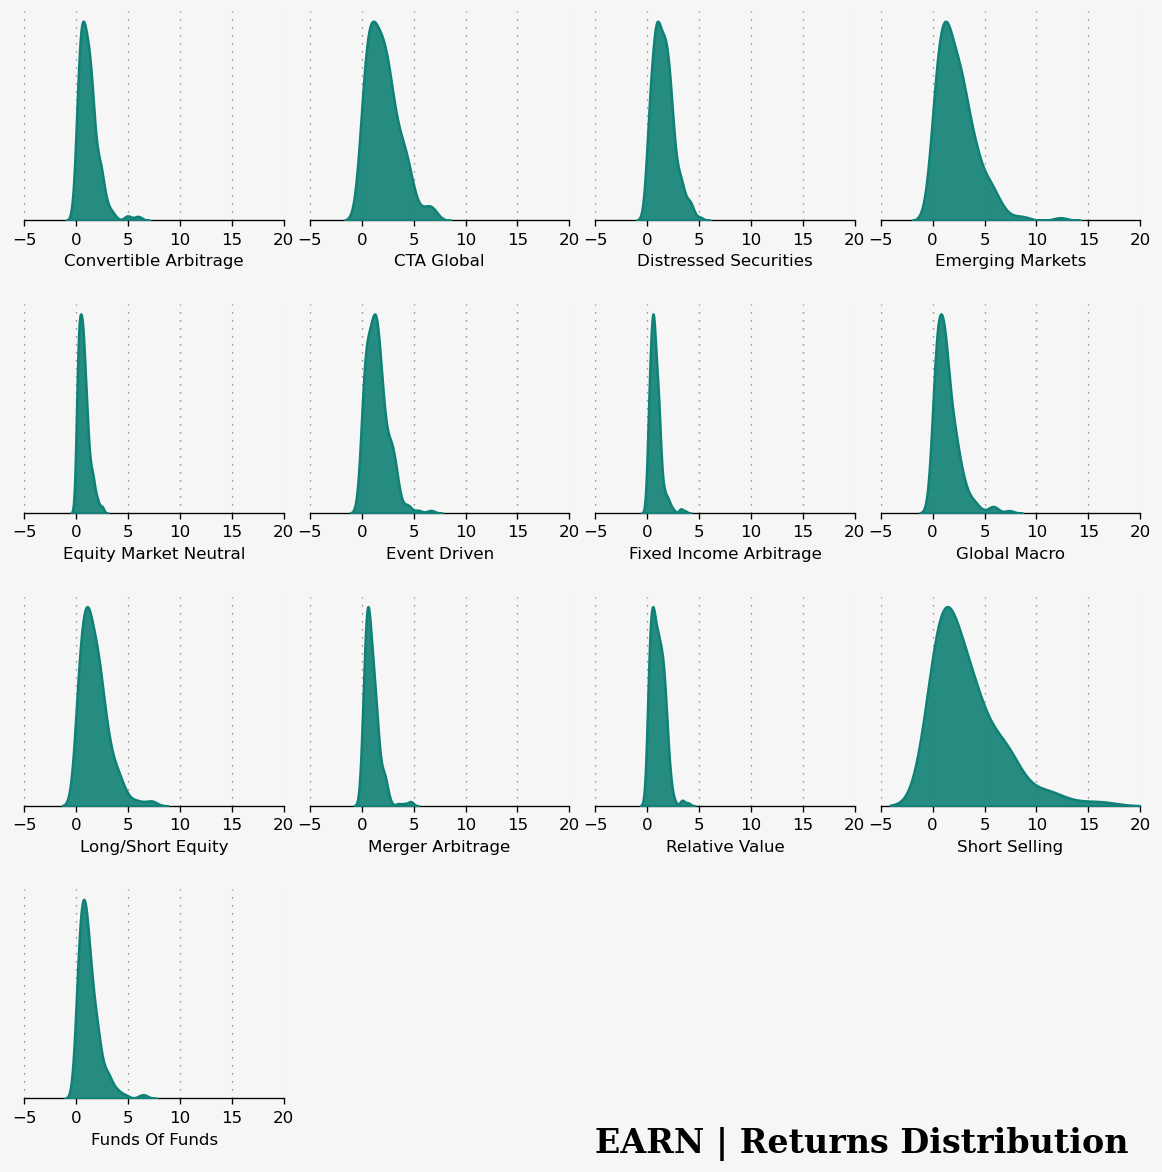

In [14]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"



run_no = 0
for row in range(0, 4):
    for col in range(0, 4):
        if row == 3 and col > 0:
            break
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_xlim(-5, 20)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in df.columns.tolist():
        sns.kdeplot(df[df>0][variable] ,ax=locals()["ax"+str(run_no)], color='#0f8176', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        
ax0.text(50, -2.35, 'EARN | Returns Distribution', fontsize=20, fontweight='bold', fontfamily='serif')


plt.tight_layout()
plt.show()

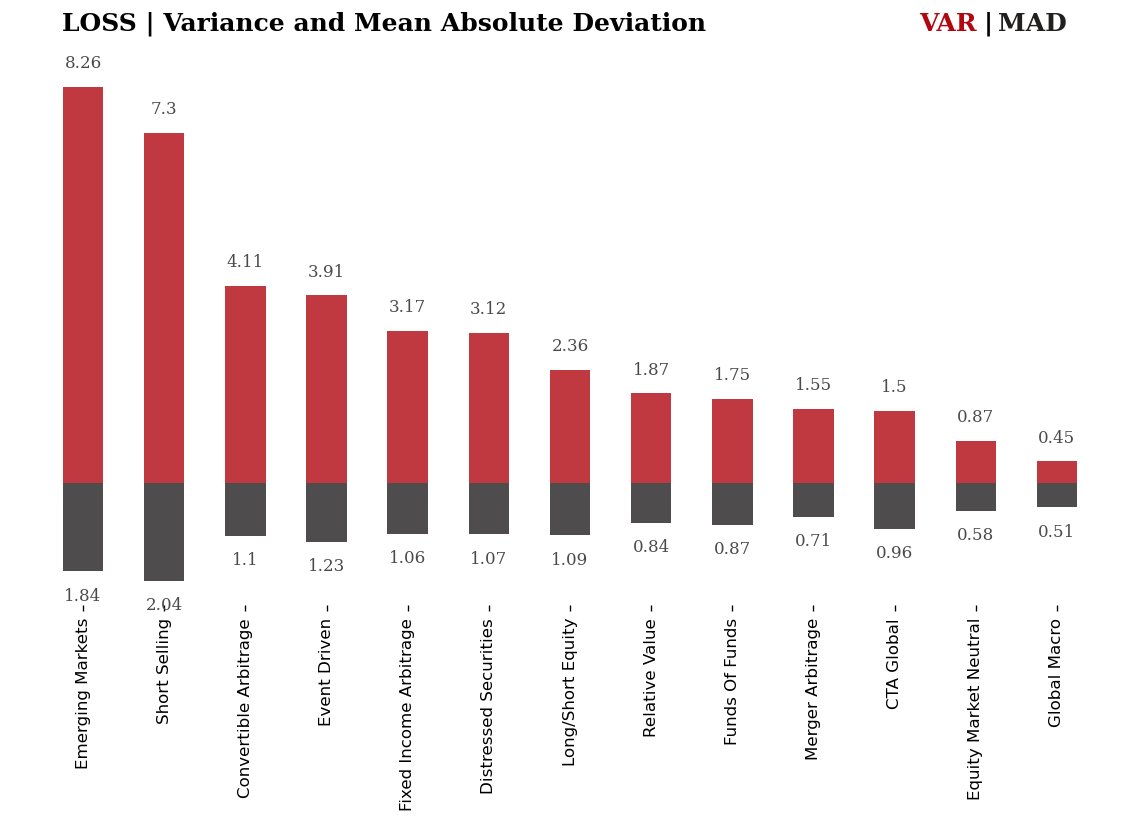

In [15]:
var = df[df<0].var().sort_values(ascending=False)
mad = - df[df<0].mad().sort_values(ascending=False)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(var.index, var, width=0.5, color='#b20710', alpha=0.8, label='VAR')
ax.bar(mad.index, mad, width=0.5, color='#221f1f', alpha=0.8, label='STD')


ax.tick_params(axis='x', labelrotation=90)

# Annotations
for i in var.index:
    ax.annotate(f"{round(var[i], 2)}", 
                   xy=(i, var[i] + 0.5),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in mad.index:
    ax.annotate(f"{-round(mad[i], 2)}", 
                   xy=(i, mad[i] - 0.5),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



ax.set_yticks([])    

fig.text(0.16, 0.924, 'LOSS | Variance and Mean Absolute Deviation', fontsize=15, fontweight='bold', fontfamily='serif')



fig.text(0.755,0.924,"VAR", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.800,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.810,0.924,"MAD", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


plt.show()

In [16]:
df_tmp = pd.DataFrame()
for col in df.columns:
    tmp = df[col].explode().to_frame(name='value').reset_index()
    tmp['type'] = col
    df_tmp = pd.concat([df_tmp, tmp])

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/2798894675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earn['earn_placing'] = df_earn['value'].apply(lambda x: "5%~" if x > 5 else "4%-5%" if x > 4 and x < 5  else "2%-3%" if x > 2 and x < 3 else "1%-2%" if x > 1 and x < 2 else "0%-1%")


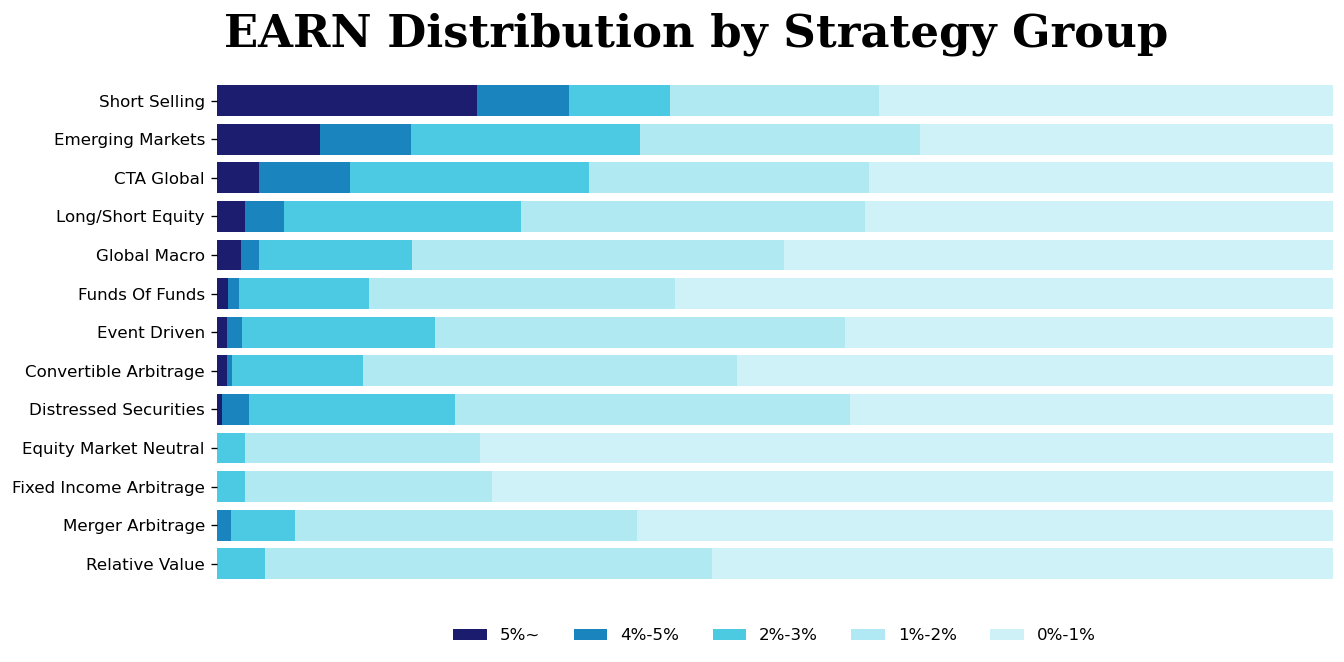

In [17]:
df_earn = df_tmp[df_tmp['value']>0]
df_earn['earn_placing'] = df_earn['value'].apply(lambda x: "5%~" if x > 5 else "4%-5%" if x > 4 and x < 5  else "2%-3%" if x > 2 and x < 3 else "1%-2%" if x > 1 and x < 2 else "0%-1%")

# Order for plotting categorical vars

placing_order = ['5%~','4%-5%','2%-3%','1%-2%','0%-1%']


group_order = df.columns.tolist()


race_place = df_earn.groupby('type')['earn_placing'].value_counts().unstack().loc[group_order].fillna(0)
race_place['sum'] = race_place.sum(axis=1)

race_place_ratio = (race_place.T / race_place['sum']).T[placing_order][::-1]
race_place_ratio = race_place_ratio.sort_values(by=placing_order[0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color) # axes background color

fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(race_place_ratio.index, race_place_ratio[placing_order[0]], 
        color='#03045e', alpha=0.9, label=placing_order[0])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[1]], left=race_place_ratio[placing_order[0]], 
        color='#0077b6', alpha=0.9, label=placing_order[1])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[2]], left=race_place_ratio[placing_order[0]]+race_place_ratio[placing_order[1]],
        color='#00b4d8', alpha=0.7, label=placing_order[2])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[3]], left=race_place_ratio[placing_order[0]]+race_place_ratio[placing_order[1]]+race_place_ratio[placing_order[2]], 
        color='#90e0ef', alpha=0.7, label=placing_order[3])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[4]],left=race_place_ratio[placing_order[0]]+race_place_ratio[placing_order[1]]+race_place_ratio[placing_order[2]]+race_place_ratio[placing_order[3]], 
        color='#caf0f8', alpha=0.9, label=placing_order[4])



ax.set_xlim(0, 1)
ax.set_xticks([])


fig.text(0.13, 0.90, 'EARN Distribution by Strategy Group', fontsize=27, fontweight='bold', fontfamily='serif')   


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=5,facecolor='white',edgecolor='white', bbox_to_anchor=(0.5, -0.1))

plt.show()


/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/2060354180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['loss_placing'] = df_loss['value'].apply(lambda x: "-5%~" if x < -5 else "-4%~-5%" if x < -4 and x > -5  else "-2%~-3%" if x < -2 and x > -3 else "-1%~-2%" if x < -1 and x > -2 else "0%~-1%")


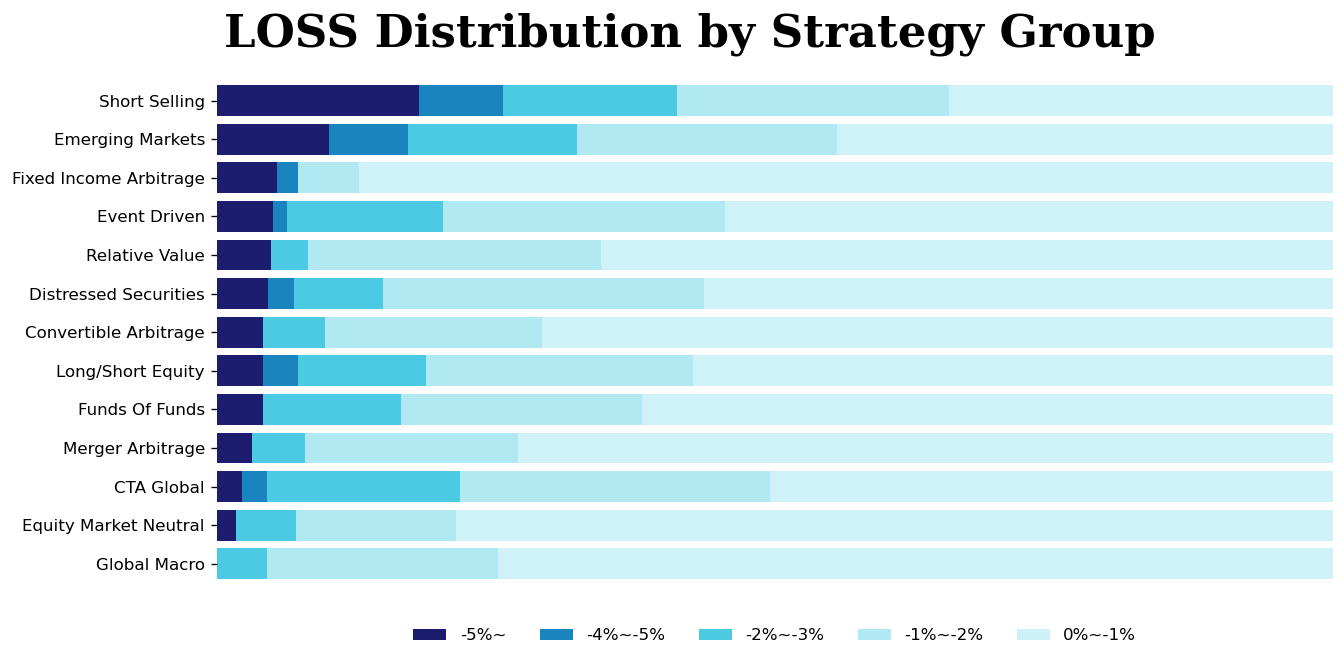

In [18]:
df_loss = df_tmp[df_tmp['value']<0]
df_loss['loss_placing'] = df_loss['value'].apply(lambda x: "-5%~" if x < -5 else "-4%~-5%" if x < -4 and x > -5  else "-2%~-3%" if x < -2 and x > -3 else "-1%~-2%" if x < -1 and x > -2 else "0%~-1%")

# Order for plotting categorical vars

placing_order = ['-5%~','-4%~-5%','-2%~-3%','-1%~-2%','0%~-1%']


group_order = df.columns.tolist()


race_place = df_loss.groupby('type')['loss_placing'].value_counts().unstack().loc[group_order].fillna(0)
race_place['sum'] = race_place.sum(axis=1)

race_place_ratio = (race_place.T / race_place['sum']).T[placing_order][::-1]
race_place_ratio = race_place_ratio.sort_values(by=placing_order[0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color) # axes background color

fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(race_place_ratio.index, race_place_ratio[placing_order[0]], 
        color='#03045e', alpha=0.9, label=placing_order[0])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[1]], left=race_place_ratio[placing_order[0]], 
        color='#0077b6', alpha=0.9, label=placing_order[1])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[2]], left=race_place_ratio[placing_order[0]]+race_place_ratio[placing_order[1]],
        color='#00b4d8', alpha=0.7, label=placing_order[2])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[3]], left=race_place_ratio[placing_order[0]]+race_place_ratio[placing_order[1]]+race_place_ratio[placing_order[2]], 
        color='#90e0ef', alpha=0.7, label=placing_order[3])
ax.barh(race_place_ratio.index, race_place_ratio[placing_order[4]],left=race_place_ratio[placing_order[0]]+race_place_ratio[placing_order[1]]+race_place_ratio[placing_order[2]]+race_place_ratio[placing_order[3]], 
        color='#caf0f8', alpha=0.9, label=placing_order[4])



ax.set_xlim(0, 1)
ax.set_xticks([])


fig.text(0.13, 0.90, 'LOSS Distribution by Strategy Group', fontsize=27, fontweight='bold', fontfamily='serif')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=5,facecolor='white',edgecolor='white', bbox_to_anchor=(0.5, -0.1))

plt.show()


In [19]:
yield_data = dict.fromkeys(cols, 1)
for col in cols:
    for i in range(len(df)): 
        yield_data[col] = yield_data[col] + yield_data[col]*df[col][i]/100

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/3257375404.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax0.plot(Xend*0.975,data[col][-1], 'ko', markersize=10, fillstyle='full',color=color, markeredgewidth=1.5)


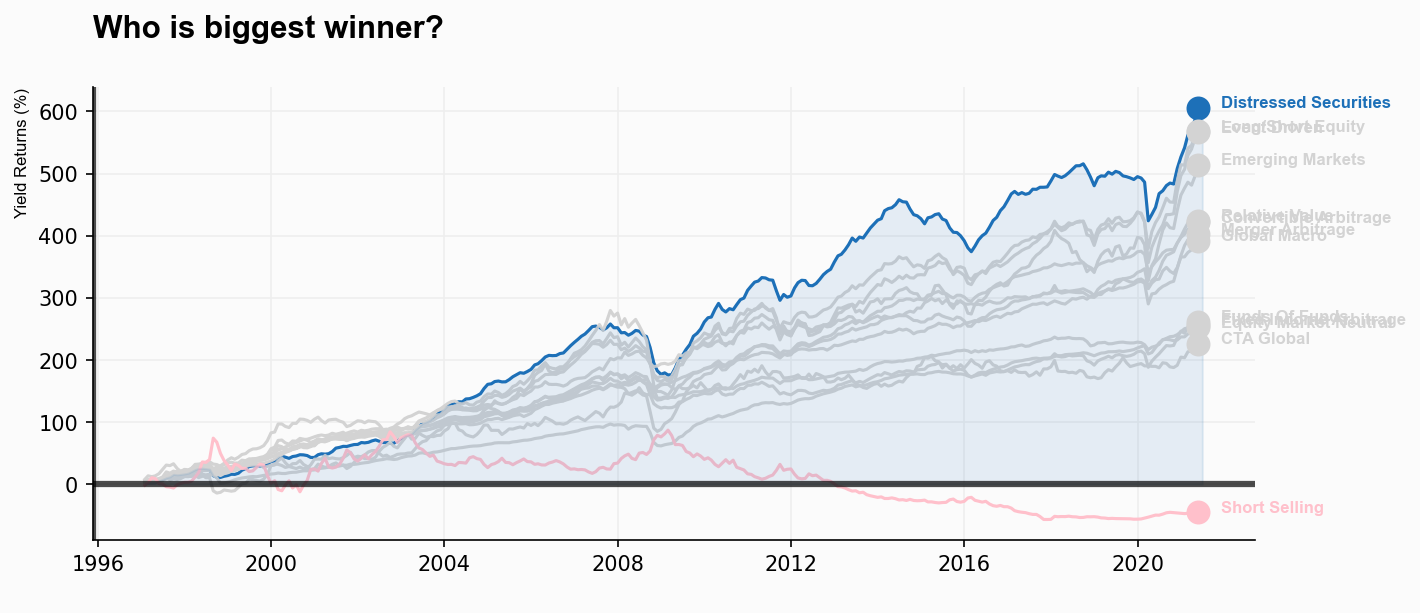

In [20]:
fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    

data = ((1+df/100).cumprod()-1)*100
data = data.sort_values(df.last_valid_index(), axis=1,ascending=False)

# list to use for plotting 
first = '#1d70b8'
others = 'lightgray'
bad = 'pink'
for idx, col in enumerate(data.columns.tolist()):
    color = first if idx == 0 else others
    color = bad if data[col][-1] < 0 else color
    sns.lineplot(ax=ax0,data=data[col], x=data[col].index, y=data[col],color=color)


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([Ystart,Yend])
ax0.set_xlim([Xstart,Xend])
ax0.text(Xstart+7,Yend+(Yend*0.11), 'Who is biggest winner?', color='black',fontfamily='Arial', fontsize=15, ha='left', va='bottom', weight='bold')
    
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.set_xlim(Xstart+7, Xend)
    
ax0.set_ylabel("Yield Returns (%)",loc='top', fontfamily='arial',fontsize=8)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.tick_params(labelsize=10)
ax0.fill_between(data.iloc[:, 0].index, data.iloc[:, 0], color=first, zorder=2, alpha=0.1)

for idx, col in enumerate(data.columns.tolist()):
    color = first if idx == 0 else others
    color = bad if data[col][-1] < 0 else color
    ax0.text(Xend*0.985,data[col][-1], col, color=color,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
    ax0.plot(Xend*0.975,data[col][-1], 'ko', markersize=10, fillstyle='full',color=color, markeredgewidth=1.5)


ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')

ax0.axhline(y = 0, color = 'black', linewidth = 3, alpha = .7)
ax0.axvline(x = Xstart+7, color = 'black', linewidth = 3, alpha = .7)


plt.show()

In [21]:
yield_data_series = data.iloc[-1]

/var/folders/w7/rjwp4f_d3jj3w9ss10tfp3t80000gn/T/ipykernel_29632/464825340.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.index, fontfamily='serif', rotation=0)


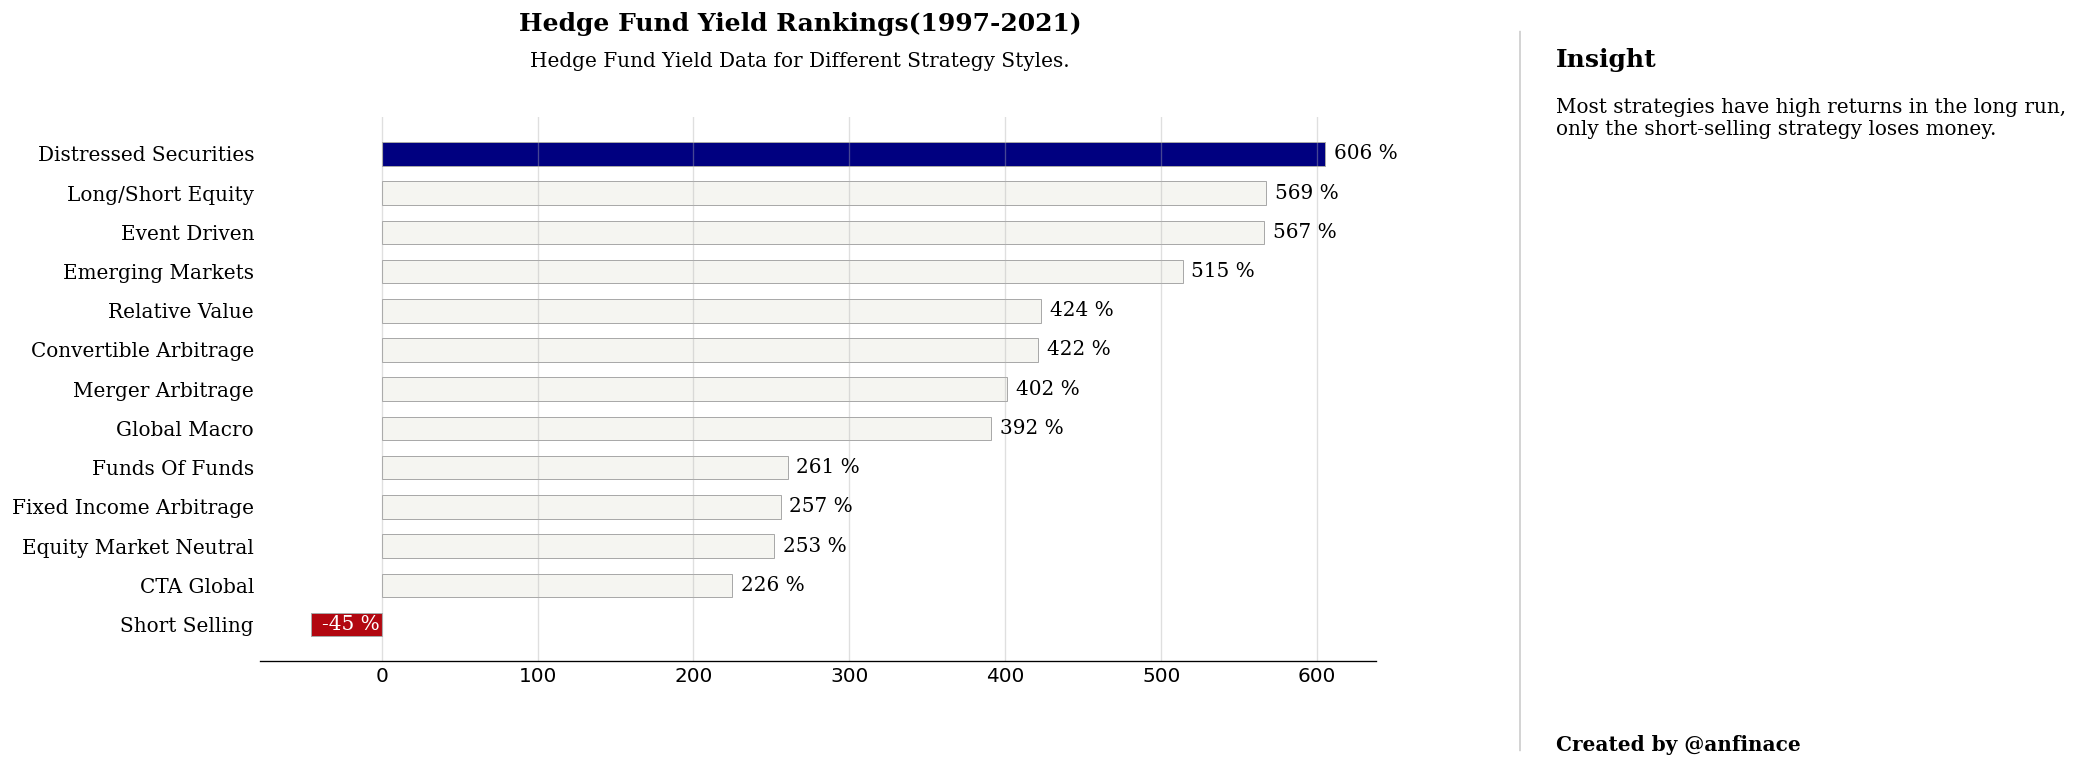

In [22]:
data = yield_data_series.sort_values()

# Plot

color_map = ['#f5f5f1' for _ in range(len(data))]
color_map[0] = '#b20710' # color highlight
color_map[-1] = 'navy'
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.barh(data.index, data-1, height=0.6, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
sign = 1
for i in data.index:
    color = 'white' if data[i]-1<0 else 'black'
    if data[i] < 1:
        sign = -1
    else:
        sign = 1
    ax.annotate(f"{round((data[i]))} %", 
                   xy=(data[i]+25, i), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', fontsize='12', color=color)

# # Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_yticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.5, 1, 'Hedge Fund Yield Rankings(1997-2021)', fontsize=15, fontweight='bold', fontfamily='serif', ha='center')
fig.text(0.5, 0.95, 'Hedge Fund Yield Data for Different Strategy Styles.', fontsize=12, fontweight='light', fontfamily='serif', ha='center')

fig.text(1.025, 0.95, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.025, 0.825, '''
Most strategies have high returns in the long run, 
only the short-selling strategy loses money.
''', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.025, 0, 'Created by @anfinace', fontsize=12, fontweight='bold', fontfamily='serif')

ax.grid(axis='x', linestyle='-', alpha=0.4)   
ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.savefig('Hedge Fund Yield Rankings(1997-2021).jpg', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
range_rank = (df[df<0].max()-df[df<0].min()).rank()
range_rank

Convertible Arbitrage     10.0
CTA Global                 2.0
Distressed Securities      9.0
Emerging Markets          13.0
Equity Market Neutral      3.0
Event Driven              11.0
Fixed Income Arbitrage     8.0
Global Macro               1.0
Long/Short Equity          7.0
Merger Arbitrage           6.0
Relative Value             4.0
Short Selling             12.0
Funds Of Funds             5.0
dtype: float64

In [24]:
mad_rank = df[df<0].mad().rank()
mad_rank

Convertible Arbitrage     10.0
CTA Global                 6.0
Distressed Securities      8.0
Emerging Markets          12.0
Equity Market Neutral      2.0
Event Driven              11.0
Fixed Income Arbitrage     7.0
Global Macro               1.0
Long/Short Equity          9.0
Merger Arbitrage           3.0
Relative Value             4.0
Short Selling             13.0
Funds Of Funds             5.0
dtype: float64

In [25]:
var_rank = df[df<0].var().rank()
var_rank

Convertible Arbitrage     11.0
CTA Global                 3.0
Distressed Securities      8.0
Emerging Markets          13.0
Equity Market Neutral      2.0
Event Driven              10.0
Fixed Income Arbitrage     9.0
Global Macro               1.0
Long/Short Equity          7.0
Merger Arbitrage           4.0
Relative Value             6.0
Short Selling             12.0
Funds Of Funds             5.0
dtype: float64

In [26]:
std_rank = df[df<0].std().rank()
std_rank

Convertible Arbitrage     11.0
CTA Global                 3.0
Distressed Securities      8.0
Emerging Markets          13.0
Equity Market Neutral      2.0
Event Driven              10.0
Fixed Income Arbitrage     9.0
Global Macro               1.0
Long/Short Equity          7.0
Merger Arbitrage           4.0
Relative Value             6.0
Short Selling             12.0
Funds Of Funds             5.0
dtype: float64

In [27]:
discrete_rank = (range_rank + mad_rank + var_rank + std_rank).rank()
discrete_rank = discrete_rank.apply(lambda x: x/discrete_rank.max() * 100)

In [28]:
yield_rank = yield_data_series.rank(ascending=False)
yield_rank

Distressed Securities      1.0
Long/Short Equity          2.0
Event Driven               3.0
Emerging Markets           4.0
Relative Value             5.0
Convertible Arbitrage      6.0
Merger Arbitrage           7.0
Global Macro               8.0
Funds Of Funds             9.0
Fixed Income Arbitrage    10.0
Equity Market Neutral     11.0
CTA Global                12.0
Short Selling             13.0
Name: 2021-06-30 00:00:00, dtype: float64

In [29]:
mean_rank = df.mean().rank(ascending=False)
mean_rank

Convertible Arbitrage      5.0
CTA Global                12.0
Distressed Securities      1.0
Emerging Markets           2.0
Equity Market Neutral     11.0
Event Driven               4.0
Fixed Income Arbitrage    10.0
Global Macro               8.0
Long/Short Equity          3.0
Merger Arbitrage           7.0
Relative Value             6.0
Short Selling             13.0
Funds Of Funds             9.0
dtype: float64

In [30]:
median_rank = df.median().rank(ascending=False)
median_rank

Convertible Arbitrage      6.0
CTA Global                12.0
Distressed Securities      2.0
Emerging Markets           1.0
Equity Market Neutral     10.5
Event Driven               3.0
Fixed Income Arbitrage     8.0
Global Macro              10.5
Long/Short Equity          4.0
Merger Arbitrage           7.0
Relative Value             5.0
Short Selling             13.0
Funds Of Funds             9.0
dtype: float64

In [31]:
earn_rank = (yield_rank + mean_rank + median_rank).rank()
earn_rank = earn_rank.apply(lambda x: x/earn_rank.max() * 100)

In [32]:
(earn_rank * 1 + discrete_rank * 0.8).rank().sort_values()

Distressed Securities      1.0
Long/Short Equity          2.0
Global Macro               3.0
Relative Value             4.0
Merger Arbitrage           5.0
Emerging Markets           6.0
Event Driven               7.0
Equity Market Neutral      8.0
Funds Of Funds             9.0
CTA Global                10.5
Convertible Arbitrage     10.5
Fixed Income Arbitrage    12.0
Short Selling             13.0
dtype: float64